# 线性回归

## 相关性判断

### 相关系数计算

![jupyter](./class_nine_1.png)

In [1]:
import pandas as pd
import numpy as np

In [3]:
income = pd.read_csv(r'./data_for_pandas/Salary_Data.csv')
income.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#计算两个变量之间的相关系数
income.Salary.corr(income.YearsExperience)

0.9782416184887598

In [6]:
profit = pd.read_excel(r'./data_for_pandas/Predict to Profit.xlsx')
profit.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#计算一个变量与多个变量的相关系数
profit.drop('State', axis=1).corrwith(profit['Profit'])

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
Profit             1.000000
dtype: float64

In [10]:
#计算多个变量两两之间的相关系数
profit.drop('State', axis=1).corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing_Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


### 绘制散点图
判断相关性，是否为一元线性回归


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
income = pd.read_csv(r'./data_for_pandas/Salary_Data.csv')
income.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


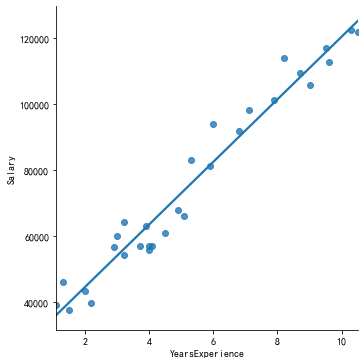

In [11]:
sns.lmplot(x='YearsExperience', y='Salary', data = income, ci=None)#ci：回归估计的置信区间的大小。这将使用回归线周围的半透明带绘制。 使用自助法（bootstrap）估计置信区间; 对于大型数据集，建议通过将此参数设置为None来避免该计算。
plt.show()

## 一元线性回归
相关分析：  
    绘制散点图  
    计算相关系数：covr  
回归分析：  
    回归模型：y=a+bx+e  
    模型拟合的越好，则误差项e应该越小  
    e的平方  
    (y - (a+bx))\*\*2 = e\*\*2  
    则求关于参数a和b的两个偏导数，最终令两个偏导数为0    
    推导参考书籍：p165(刘顺祥）

In [ ]:
#导入第三方模块  
import statsmodels.api as sm
sm.ols(formula, data, subset=None, drop_cols=None)

formula：以字符串的形式指定线性回归模型的公式，如'y-x'就表示简单线性回归模型
data：指定建模的数据集
subset：通过bool类型的数组对象，获取data的子集用于建模
drop_cols：指定需要从data中删除的变量

### 模型求解

![jupyter](./class_nine_2.png)

In [15]:
import pandas as pd
income = pd.read_csv(r'./data_for_pandas/Salary_Data.csv')
income.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
# 计算样本量
n = income.shape[0]
n

30

In [16]:
#计算自变量、因变量、自变量平方、自变量和因变量乘积的和
sum_x = income.YearsExperience.sum()
sum_y = income.Salary.sum()
sum_x2 = income.YearsExperience.pow(2).sum()
xy = income.YearsExperience * income.Salary
sum_xy = xy.sum()

In [18]:
#根据公式计算回归模型的参数
b = (sum_xy - sum_x*sum_y/n) / (sum_x2 - sum_x**2/n)
a = income.Salary.mean() - b*income.YearsExperience.mean()

print(a, b)

25792.200198668666 9449.962321455081


### 线性回归模型

In [2]:
import pandas as pd
import statsmodels.api as sm

In [4]:
income = pd.read_csv('./data_for_pandas/Salary_Data.csv')

In [5]:
income.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#利用收入数据集，构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience', data=income).fit()

In [7]:
#返回模型的参数值
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
#模型结果
Salary = 25792.20 + 9449.96YearsExperience

## 多元线性回归

多个因变量影响自变量  
参考书籍：p165(刘顺祥）

![jupyter](./class_nine_3.png)

![jupyter](./class_nine_4.png)

![jupyter](./class_nine_5.png)

![jupyter](./class_nine_6.png)

In [47]:
#数据拆分
#导入模块
from sklearn import model_selection

profit = pd.read_excel(r'./data_for_pandas/Predict to Profit.xlsx')

#将数据拆分成训练集和测试集
train, test = model_selection.train_test_split(profit, test_size=0.2, random_state=1234)
train.head()
test.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
8,120542.52,148718.95,311613.29,New York,152211.77
48,542.05,51743.15,0.00,New York,35673.41
14,119943.24,156547.42,256512.92,Florida,132602.65
42,23640.93,96189.63,148001.11,California,71498.49
29,65605.48,153032.06,107138.38,New York,101004.64


In [48]:
import statsmodels.api as sm
#根据train数据集建模
model = sm.formula.ols('Profit ~ RD_Spend+Administration+Marketing_Spend+C(State)', data=train).fit()#C(State)表示分类变量
model.params

Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64

model.predict(exog=None, trainsform=True)  
exog：指定用于预测的其他自变量的值  
transform：bool类型参数，测试时是否将原始数据按照模型表达式进行转换，默认为True

In [50]:
#删除test数据集中的Profit变量数据，用剩下的变量进行预测
test_X = test.drop(labels = 'Profit', axis=1)
pred = model.predict(exog=test_X)
difference = pred - test.Profit

pd.DataFrame({'prediction':pred, 'Real':test.Profit, 'Difference':difference, 'Precent':(difference/test.Profit).map(lambda x:format(x, '.2%')) })


,prediction,Real,Difference,Precent
8,150621.345801,152211.77,-1590.424199,-1.04%
48,55513.218079,35673.41,19839.808079,55.62%
14,150369.022458,132602.65,17766.372458,13.40%
42,74057.015562,71498.49,2558.525562,3.58%
29,103413.378282,101004.64,2408.738282,2.38%
44,67844.850378,65200.33,2644.520378,4.06%
4,173454.059691,166187.94,7266.119691,4.37%
31,99580.888894,97483.56,2097.328894,2.15%
13,128147.138396,134307.35,-6160.211604,-4.59%
18,130693.433835,124266.90,6426.533835,5.17%


In [26]:
#哑变量处理
#生成由State变量衍生的哑变量
dummies = pd.get_dummies(profit.State)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [29]:
#将哑变量与原始数据集合并
profit_new = pd.concat([profit, dummies], axis=1)
profit_new.head(10)

,RD_Spend,Administration,Marketing_Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [30]:
#删除State变量
#以New York 为参照组，另外两组为变量数据
profit_new.drop(labels=['State', 'New York'], axis=1, inplace=True)
profit_new.head()

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [32]:
#拆分数据集，建立模型
train, test = model_selection.train_test_split(profit_new, test_size=0.2, random_state=1234)
model2 = sm.formula.ols('Profit ~ RD_Spend+Administration+Marketing_Spend+Florida+California', data=train).fit()
model2.params

Intercept          58068.048193
RD_Spend               0.803487
Administration        -0.057792
Marketing_Spend        0.013779
Florida             1440.862734
California           513.468310
dtype: float64

In [42]:
#使用test数据集进行预测
test_X = test.drop(labels='Profit', axis=1)
pred = model2.predict(exog=test_X)
difference = pred - test.Profit
pd.DataFrame({'Predict':pred, 'Real':test.Profit, 'Difference':difference, 'Precent':(difference/pred).map(lambda x: format(x, '.2%'))})
sum(difference/pred)/len(pred)

0.06258544388471521

## 假设检验
提出问题的原假设和备择假设  
在原假设的条件下，构造统计量  
根据样本信息，计算统计量的值  
对统计量的值和理论值，当统计量超过理论值时，拒绝原假设，否则接受原假设

### 模型的F检验
F检验模型是否可用，即所有的多元回归系数是否为0

![jupyter](./class_nine_7.png)

ESS：误差平方和，衡量的是因变量的实际值与预测值之间的离差平方和，随着模型的变化而变化  
RSS：回归离差平方和，衡量因变量的预测值与实际值均值之间的离差平方和，同样会随着模型的变化而变化  
TSS：总的离差平方和，衡量的是因变量的值与其均值之间的离差平方和，而其值并不会随模型的变化而变动，即它是一个固定值  
TSS = ESS + RSS  
由于TSS的值不会随着模型的变化而变动，因此ESS与RSS之间存在严格的负向关系，即ESS的降低会导致RSS的增加。线性回归模型的参数求解是根据误差平方和最小的理论，则模型得到的ESS最小，那么对应的RSS值就会最大。  
p和n-p-1分别为RSS和ESS的自由度  

In [57]:
#统计量的计算

import numpy as np

#计算建模数据中因变量的均值
ybar = train.Profit.mean()
ybar

#统计变量个数和观察个数
p = model2.df_model
p
n = train.shape[0]
n

#计算回归离差平方和
model2.fittedvalues
RSS = np.sum((model2.fittedvalues - ybar)**2)

#计算误差平方和
ESS = np.sum(model2.resid**2)

#计算总的离差平方和
TSS = np.sum((train.Profit - ybar)**2)

print(RSS, ESS, TSS, RSS+ESS)

52067443966.5863 1967765724.576365 54035209687.7603 54035209691.16267


In [60]:
#手工计算F统计量的值
F = (RSS/p) / (ESS/(n-p-1))
F

174.63721716844725

In [62]:
#模型自带F统计量
model2.fvalue

174.6372171570355

In [63]:
#理论F值，置信水平为0.05，自由度为(p, n-p-1)
from scipy.stats import f
F_theroy = f.ppf(q=0.95, dfn=p, dfd=n-p-1)
F_theroy

2.502635007415366

F实际值远大于F理论值，那么原假设不成立，则回归模型得偏回归系数不全都为0

### t检验
验证每一个自变量是否能够成为影响因变量得重要因素

![jupyter](./class_nine_8.png)

In [64]:
#模型的概览信息
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           9.74e-23
Time:                        20:55:08   Log-Likelihood:                -401.20
No. Observations:                  39   AIC:                             814.4
Df Residuals:                      33   BIC:                             824.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.807e+04   6846.305      8.482      0.000    4.41e+04     7.2e+04
RD_Spend            0.8035      0.040     19.988      0.000       0.722       0.885
Administration     -0.0578      0.051     -1.133      0.265      -0.162       0.046
Marketing_Spend     0.0138      0.015      0.930      0.359      -0.016       0.044
Florida          1440.8627   3059.931      0.471      0.641   -4784.615    7666.340
California        513.4683   3043.160      0.169      0.867   -5677.887    6704.824
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.148
Skew:                           0.096   Prob(JB):                        0.563
Kurtosis:                       2.182   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

每个偏回归系数有对应的t统计量值，每个统计值对应概率值p，通常p小于0.05时，表示拒绝原假设，即在模型中该自变量是影响因变量的重要因素  

# 回归模型的诊断

## 模型的假设前提

1.误差项服从正态分布  
2.误差项的独立性  
3.无多重共线性  
4.线性相关  
5.方差齐性  

## 正态性检验
模型的假设前提是对残差项要求服从正态分布，但实际上是要求因变量服从正态分布

### 定性图形法

#### 直方图

In [31]:
import scipy.stats as stats
stats.norm

/mnt/d/WSL/conda/miniconda3/envs/normal/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


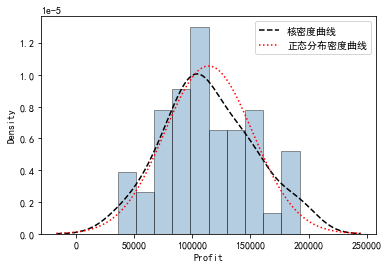

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

#绘制直方图
sns.distplot(a=profit_new.Profit, bins=10,  fit=stats.norm, norm_hist=True,#norm_hist=True表示纵轴显示的高度是密度而不是计数
            hist_kws={'color':'steelblue', 'edgecolor':'black'},
            kde_kws = {'color':'black', 'linestyle':'--', 'label':'核密度曲线'},
            fit_kws = {'color':'red', 'linestyle':':', 'label':'正态分布密度曲线'}
            )

plt.legend()
plt.show()

如果该变量的核密度曲线与正态分布理论密度曲线近似或者吻合，就说明该变量近似符合正态分布

#### PP图和QQ图
PP图的思想是比对正态分布的累积概率值和实际分布的累积概率值  
QQ图则比对正态分布的分位数和实际分布的分位数

/mnt/d/WSL/conda/miniconda3/envs/normal/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


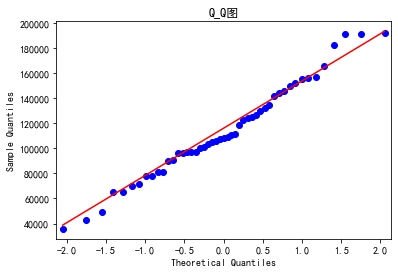

In [96]:
#残差的正态性检验
pp_qq_plot = sm.ProbPlot(profit_new.Profit, dist=stats.norm)

#绘制PP图
#pp_qq_plot.ppplot(line='45')
#plt.title('P_P图')
#fig = plt.figure()
#res = stats.probplot(profit_new.Profit, plot=plt)

## 绘制QQ图
pp_qq_plot.qqplot(line='q')
plt.title('Q_Q图')

plt.show()

判断标准：如果散点都比较均匀的散落在直线上，则说明变量近似服从正态分布

### 定量法
shapiro检验和K-S检验  
这两种检验方法均属于非参数方法，原假设认为变量服从正态分布。两者的区别是适用的数据量不一样，当数据量低于5000时，则使用shapiro检验法比较合理；否则使用K-S检验法  

#### shapiro

In [97]:
import scipy.stats as stats

#shapiro检验
stats.shapiro(profit_new.Profit)


ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)

p值大于置信水平0.05，则接受变量服从正态分布的原假设

#### K-S

In [98]:
#生成正态分布和均匀分布随机数
rnorm = np.random.normal(loc=5, scale=2, size=10000)
runif = np.random.uniform(low=1, high=100, size=10000)

#正态性检验
KS_norm = stats.kstest(rvs=rnorm, args=(rnorm.mean(), rnorm.std()),#args传递被检测变量的均值和标准差
                      cdf = 'norm'
                      )
KS_uniform = stats.kstest(rvs=runif, args=(runif.mean(), runif.std()),
                      cdf='norm'
                         )

print(KS_norm, KS_uniform)

KstestResult(statistic=0.006899806144776366, pvalue=0.7251056873564456) KstestResult(statistic=0.06140755518660346, pvalue=3.183767014670666e-33)


正态分布随机数的检验，p值大于置信水平0.05，则接受原假设；均匀分布随机数的检验，p值远小于0.05，则拒绝原假设

## 多重共线性检验
多重共线性是指模型中的自变量之间存在较高的线性相关关系  
多重共线性的检验：  
方差膨胀因子VIF：如果VIF大于10，则说明变量间存在多重共线性；如果VIF大于100，则表明变量之间存在严重的多重共线性  
VIF = 1/(1-R\*\*2)

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import scipy.stats as stats

In [4]:
profit = pd.read_excel(r'./data_for_pandas/Predict to Profit.xlsx')
profit.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dunmmies = pd.get_dummies(profit.State)
dunmmies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [9]:
profit_new = pd.concat([profit, dunmmies], axis=1)
profit_new.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [10]:
profit_new.drop(labels=['State', 'New York'], axis=1, inplace=True)
profit_new.head()

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [14]:
#自变量X（包含RD_Spend、Marketing_Spend和常数列1）
import statsmodels.api as sm
X = sm.add_constant(profit_new[['RD_Spend', 'Marketing_Spend']])
X.head()

,const,RD_Spend,Marketing_Spend
0,1.0,165349.20,471784.10
1,1.0,162597.70,443898.53
2,1.0,153441.51,407934.54
3,1.0,144372.41,383199.62
4,1.0,142107.34,366168.42


In [15]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif

,features
0,const
1,RD_Spend
2,Marketing_Spend


In [19]:
X.shape[1]
X.values

array([[1.0000000e+00, 1.6534920e+05, 4.7178410e+05],
       [1.0000000e+00, 1.6259770e+05, 4.4389853e+05],
       [1.0000000e+00, 1.5344151e+05, 4.0793454e+05],
       [1.0000000e+00, 1.4437241e+05, 3.8319962e+05],
       [1.0000000e+00, 1.4210734e+05, 3.6616842e+05],
       [1.0000000e+00, 1.3187690e+05, 3.6286136e+05],
       [1.0000000e+00, 1.3461546e+05, 1.2771682e+05],
       [1.0000000e+00, 1.3029813e+05, 3.2387668e+05],
       [1.0000000e+00, 1.2054252e+05, 3.1161329e+05],
       [1.0000000e+00, 1.2333488e+05, 3.0498162e+05],
       [1.0000000e+00, 1.0191308e+05, 2.2916095e+05],
       [1.0000000e+00, 1.0067196e+05, 2.4974455e+05],
       [1.0000000e+00, 9.3863750e+04, 2.4983944e+05],
       [1.0000000e+00, 9.1992390e+04, 2.5266493e+05],
       [1.0000000e+00, 1.1994324e+05, 2.5651292e+05],
       [1.0000000e+00, 1.1452361e+05, 2.6177623e+05],
       [1.0000000e+00, 7.8013110e+04, 2.6434606e+05],
       [1.0000000e+00, 9.4657160e+04, 2.8257431e+05],
       [1.0000000e+00, 9.174

In [20]:
list_res = []
for i in range(X.shape[1]):
    list_res.append(variance_inflation_factor(X.values, i))
vif['VIF Factor'] = list_res

In [21]:
vif

,features,VIF Factor
0,const,4.540984
1,RD_Spend,2.026141
2,Marketing_Spend,2.026141


两个变量的方差膨胀因子均低于10，说明构建的模型的自变量之间不存在多重共线性  
如果变量之间存在多重共线性，可以考虑删除变量或更换模型  

## 线性相关性检验
检验建模的自变量和因变量之间存在线性关系

In [23]:
#计算每个自变量与因变量之间的相关系数
profit_new.drop('Profit', axis=1).corrwith(profit.Profit)

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
California        -0.083258
Florida            0.088008
dtype: float64

![jupyter](./class_nine_1.png)

In [26]:
import matplotlib.pyplot as plt
import seaborn

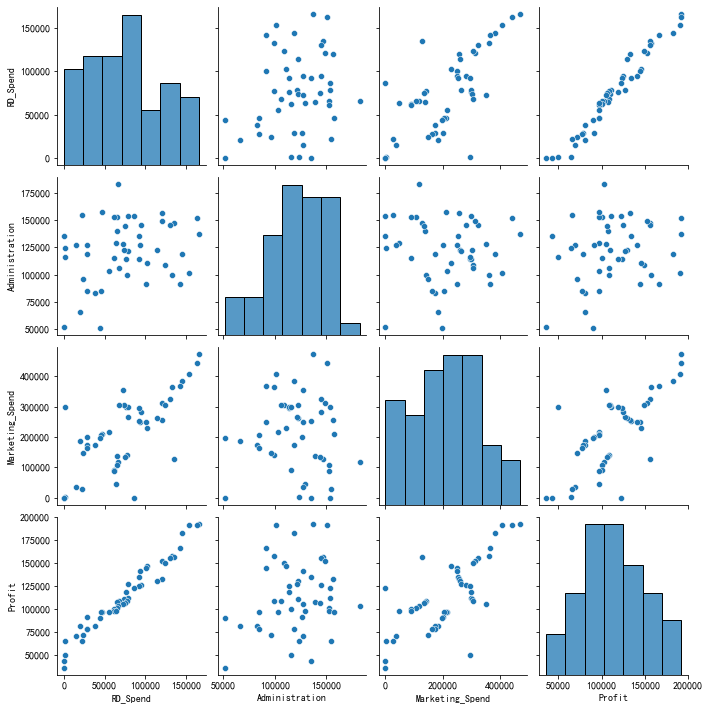

In [27]:
#多个变量之间的散点图矩阵
seaborn.pairplot(profit_new[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']])
plt.show()

模型修正

综合考虑相关系数、散点图矩阵和t检验结果，最终确定只保留RD_Spend和Marketing_Spend两个自变量

In [30]:
from  sklearn import model_selection
train, test = model_selection.train_test_split(profit, test_size=0.2,random_state=1234)
model3 = sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend', data=train).fit()
model3.params

Intercept          51902.112471
RD_Spend               0.785116
Marketing_Spend        0.019402
dtype: float64

修正模型：Profit = 51902.11 + 0.79RD_Spend + 0.02Marketing_Spend

In [32]:
test_x = test.drop(labels='Profit', axis=1)
pred = model3.predict(exog=test_x)
difference = pred - test.Profit
pd.DataFrame({'Predict':pred, 'Real':test.Profit, 'Difference':difference, 'Precent':(difference/pred).map(lambda x: format(x, '.2%'))})

,Predict,Real,Difference,Precent
8,152587.822689,152211.77,376.052689,0.25%
48,52327.684422,35673.41,16654.274422,31.83%
14,151048.266969,132602.65,18445.616969,12.21%
42,73334.479175,71498.49,1835.989175,2.50%
29,105488.690740,101004.64,4484.050740,4.25%
44,69863.951028,65200.33,4663.621028,6.68%
4,170577.173790,166187.94,4389.233790,2.57%
31,101612.843515,97483.56,4129.283515,4.06%
13,129028.958229,134307.35,-5278.391771,-4.09%
18,129657.814636,124266.90,5390.914636,4.16%


## 异常值检验
多元线性回归模型容易受到极端值的影响，所以需要对观测样本进行异常值检测

帽子矩阵  
DFFITS准则  
Cook距离  
标准化残差（学生化残差）  
注意：使用以上四种方法得前提是已经构造好了一个线性回归模型

In [34]:
#异常值检验
outliers = model3.get_influence()
outliers

In [35]:
#高杆杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag
leverage

array([0.06651655, 0.09336168, 0.03274069, 0.03960018, 0.04298291,
       0.04418066, 0.04868271, 0.13901515, 0.10488643, 0.23470711,
       0.08705262, 0.04187855, 0.04076524, 0.03341389, 0.15730883,
       0.03467375, 0.06452631, 0.09215405, 0.0415147 , 0.19822477,
       0.11190251, 0.04106913, 0.12306558, 0.05518946, 0.03044368,
       0.07236183, 0.0513544 , 0.05760172, 0.04444256, 0.06506217,
       0.05043519, 0.05733067, 0.0570313 , 0.04797132, 0.04851554,
       0.03003842, 0.07727349, 0.21563375, 0.12509048])

In [36]:
#dffits值
dffits = outliers.dffits[0]
dffits

array([ 0.46641002,  0.22122977, -0.15622507,  0.2706774 , -0.2285633 ,
        0.02611072, -0.16876823,  0.20542008, -0.24515352, -0.78258389,
       -0.45020948,  0.11966647,  0.05657203, -0.07068492,  0.08534434,
        0.21737188, -0.16877793,  0.45907949, -0.01042913, -0.28749002,
        0.54707588,  0.12379838,  0.66544696, -0.15979727,  0.2087459 ,
       -0.20952907, -0.08657383,  0.01362628, -0.13219258, -0.0858194 ,
       -0.24832566,  0.0267523 , -0.06959013, -0.5523728 , -0.20069164,
        0.26845919,  0.39777428,  0.23452568, -0.50555712])

In [37]:
#标准化残差
resid_stu = outliers.resid_studentized_external
resid_stu

array([ 1.7472551 ,  0.68940795, -0.84913795,  1.33299782, -1.07849573,
        0.12144808, -0.74604667,  0.51122206, -0.71617234, -1.41312839,
       -1.45796323,  0.57238326,  0.2744222 , -0.380175  ,  0.19752969,
        1.14693811, -0.64263301,  1.44090968, -0.05011177, -0.57818941,
        1.54119635,  0.59820613,  1.77635064, -0.66117074,  1.17802877,
       -0.75020303, -0.37209154,  0.05511587, -0.61296542, -0.32532134,
       -1.07749945,  0.1084794 , -0.2829695 , -2.46074431, -0.88877066,
        1.52551689,  1.37454173,  0.44729237, -1.33702548])

In [38]:
#cook 距离
cook = outliers.cooks_distance[0]
cook

array([6.86008059e-02, 1.65555081e-02, 8.19895756e-03, 2.39061866e-02,
       1.73351642e-02, 2.33651149e-04, 9.61263802e-03, 1.43604528e-02,
       2.03081951e-02, 1.98644866e-01, 6.55143401e-02, 4.86420426e-03,
       1.09492223e-03, 1.70599209e-03, 2.49447268e-03, 1.56133583e-02,
       9.65272915e-03, 6.82121222e-02, 3.72887632e-05, 2.80692151e-02,
       9.60930221e-02, 5.20146061e-03, 1.39268173e-01, 8.64691535e-03,
       1.43701708e-02, 1.48140502e-02, 2.55959876e-03, 6.36546075e-05,
       5.92775254e-03, 2.51751962e-03, 2.04636903e-02, 2.45295398e-04,
       1.65659377e-03, 8.91819538e-02, 1.35045210e-02, 2.31692699e-02,
       5.14699173e-02, 1.87507449e-02, 8.33719230e-02])

In [40]:
#合并各种异常值检验的统计量
concat1 = pd.concat([pd.Series(leverage, name='leverage'), pd.Series(dffits, name='dffits'), pd.Series(resid_stu, name='resid_stu'), pd.Series(cook, name='cook')], axis=1)
concat1.head()

,leverage,dffits,resid_stu,cook
0,0.066517,0.466410,1.747255,0.068601
1,0.093362,0.221230,0.689408,0.016556
2,0.032741,-0.156225,-0.849138,0.008199
3,0.039600,0.270677,1.332998,0.023906
4,0.042983,-0.228563,-1.078496,0.017335


In [41]:
train.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
36,28663.76,127056.21,201126.82,Florida,90708.19
43,15505.73,127382.30,35534.17,New York,69758.98
17,94657.16,145077.58,282574.31,New York,125370.37
10,101913.08,110594.11,229160.95,Florida,146121.95
21,78389.47,153773.43,299737.29,New York,111313.02


In [42]:
#重设train数据的行索引
train.index = range(train.shape[0])
train.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,28663.76,127056.21,201126.82,Florida,90708.19
1,15505.73,127382.30,35534.17,New York,69758.98
2,94657.16,145077.58,282574.31,New York,125370.37
3,101913.08,110594.11,229160.95,Florida,146121.95
4,78389.47,153773.43,299737.29,New York,111313.02


In [43]:
#将train与异常值统计量合并
profit_outliers = pd.concat([train, concat1], axis=1)
profit_outliers.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,leverage,dffits,resid_stu,cook
0,28663.76,127056.21,201126.82,Florida,90708.19,0.066517,0.466410,1.747255,0.068601
1,15505.73,127382.30,35534.17,New York,69758.98,0.093362,0.221230,0.689408,0.016556
2,94657.16,145077.58,282574.31,New York,125370.37,0.032741,-0.156225,-0.849138,0.008199
3,101913.08,110594.11,229160.95,Florida,146121.95,0.039600,0.270677,1.332998,0.023906
4,78389.47,153773.43,299737.29,New York,111313.02,0.042983,-0.228563,-1.078496,0.017335


使用标准化残差作为异常值判定标准：当标准化残差的绝对值大于2时，即认为对应的数据点为异常值

numpy.where(condition, x, y)
满足condition则输出x，否则输出y

In [50]:
import numpy as np
#计算异常值的比例
outliers_ratio = sum(np.where((np.abs(profit_outliers.resid_stu)>2),1,0))/profit_outliers.shape[0]
outliers_ratio

0.02564102564102564

对于异常值的处理：  
如果异常样本的比例不高（比如小于等于5%），可以考虑将异常点删除；如果异常值样本的比例比较高，选择删除会丢失一些重要信息，所以需要衍生哑变量，即对于异常点设置哑变量为1，否则为0

In [55]:
#挑选出非异常的观测点
none_outliers = profit_outliers[np.abs(profit_outliers.resid_stu)<=2]
none_outliers.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,leverage,dffits,resid_stu,cook
0,28663.76,127056.21,201126.82,Florida,90708.19,0.066517,0.466410,1.747255,0.068601
1,15505.73,127382.30,35534.17,New York,69758.98,0.093362,0.221230,0.689408,0.016556
2,94657.16,145077.58,282574.31,New York,125370.37,0.032741,-0.156225,-0.849138,0.008199
3,101913.08,110594.11,229160.95,Florida,146121.95,0.039600,0.270677,1.332998,0.023906
4,78389.47,153773.43,299737.29,New York,111313.02,0.042983,-0.228563,-1.078496,0.017335


In [56]:
#应用无异常值得数据集重新建模
model4 = sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend', data=none_outliers).fit()
model4.params

Intercept          51827.416821
RD_Spend               0.797038
Marketing_Spend        0.017740
dtype: float64

In [57]:
pred = model4.predict(exog=test_x)
difference = pred - test.Profit
pd.DataFrame({'Predict':pred, 'Real':test.Profit, 'Difference':difference, 'Precent':(difference/pred).map(lambda x: format(x, '.2%'))})

,Predict,Real,Difference,Precent
8,153432.247049,152211.77,1220.477049,0.80%
48,52259.451168,35673.41,16586.041168,31.74%
14,151977.141752,132602.65,19374.491752,12.75%
42,73295.606990,71498.49,1797.116990,2.45%
29,106018.053241,101004.64,5013.413241,4.73%
44,70006.559786,65200.33,4806.229786,6.87%
4,171588.008207,166187.94,5400.068207,3.15%
31,102120.376355,97483.56,4636.816355,4.54%
13,129630.995695,134307.35,-4676.354305,-3.61%
18,130186.711028,124266.90,5919.811028,4.55%


修正模型：Profit = 51827.42 + 0.80RD_Spend + 0.018Marketing_Spend

## 独立性检验

In [58]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     520.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           9.16e-27
Time:                        10:29:17   Log-Likelihood:                -389.18
No. Observations:                  38   AIC:                             784.4
Df Residuals:                      35   BIC:                             789.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.183e+04   2501.192     20.721      0.000    4.67e+04    5.69e+04
RD_Spend            0.7970      0.034     23.261      0.000       0.727       0.867
Marketing_Spend     0.0177      0.013      1.391      0.173      -0.008       0.044
==============================================================================
Omnibus:                        7.188   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.744
Skew:                           0.321   Prob(JB):                        0.254
Kurtosis:                       1.851   Cond. No.                     5.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

残差的独立性检验，也是对因变量y的独立性检验，通常使用Durbin-Watson统计量值测试；如果DW值在2左右，则表明残差项之间是不相关的；如果与2偏离较远，则说明不满足残差的独立性假设

模型4中的DW值比较接近于2，可认为模型的残差项之间满足独立性

## 方差齐性检验

方差齐性检验：要求模型残差项的方差不随自变量的变动而呈现某种趋势，否则残差的趋势可以被自变量所刻画

### 图形法

绘制残差与自变量之间的散点图，就可以发现二者之间是否存在某种趋势

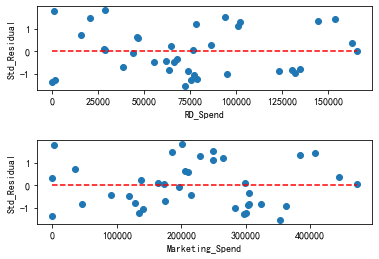

In [61]:
#设置第一张子图
ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
#绘制散点图
ax1.scatter(none_outliers.RD_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())
#添加水平参考线
ax1.hlines(y=0, xmin=none_outliers.RD_Spend.min(), xmax=none_outliers.RD_Spend.max(), color='red', linestyle='--')
ax1.set_xlabel('RD_Spend')
ax1.set_ylabel('Std_Residual')

#变量Marketing_Spend
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))
ax2.scatter(none_outliers.Marketing_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())
ax2.hlines(y=0, xmin=none_outliers.Marketing_Spend.min(), xmax=none_outliers.Marketing_Spend.max(), color='red', linestyle='--')
ax2.set_xlabel('Marketing_Spend')
ax2.set_ylabel('Std_Residual')

#设置子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.show()

残差并没有随着自变量的变动而呈现喇叭形，所有的散点几乎均匀的分布在参考线y=0附件，说明模型的残差项满足方差齐性的前提假设

### BP检验

原假设是残差的方差为一个常数，通过构造拉格朗日乘子LM统计量，实现方差齐性检验

In [63]:
sm.stats.diagnostic.het_breuschpagan(model4.resid, exog_het=model4.model.exog)

(1.4675103668307752,
 0.48010272699007805,
 0.7029751237162184,
 0.5019659740963014)

元组中包含四个值：  
第一个值为LM统计量  
第二个值是统计量对应的概率p值， 该值大于0.05，说明接受残差方差为常数的原假设   
第三个值是F统计量，用于检验残差平方项与自变量之间是否独立，如果独立则表明残差方差齐性   
第四个值为F统计量的概率p值，同样大于0.05，则进一步表明残差项满足方差齐性假设  

### 残差不满足方差齐性

如果模型的残差不满足齐性的条件：  
模型变换法：主要是考虑残差与自变量之间的关系，如果残差与某个自变量x成正比，则需要将原模型的两边同时除以根号x；如果残差与某个自变量x的平方成正比，则需要将原始模型的两边同时除以x  
加权最小二乘法：确定权重：残差的绝对值的倒数作为权重；残差平方的倒数作为权重；用残差的平方对数与自变量x重新拟合建模，并将得到的拟合值取指数，用指数的倒数作为权重

# 回归模型的预测

In [65]:
#模型对测试集的预测
pred4 = model4.predict(exog=test[['RD_Spend', 'Marketing_Spend']])
pred4.head()

8     153432.247049
48     52259.451168
14    151977.141752
42     73295.606990
29    106018.053241
dtype: float64

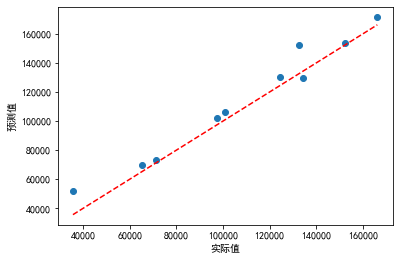

In [67]:
#绘制预测值与实际值的散点图
plt.scatter(x=test.Profit, y=pred4)
#添加斜率为1，截距项为0的参考线
plt.plot([test.Profit.min(), test.Profit.max()], [test.Profit.min(), test.Profit.max()], color='red', linestyle='--')

plt.xlabel('实际值')
plt.ylabel('预测值')
plt.show()

该散点图可以用来衡量预测值与实际值之间的距离差异，如果非常接近，那么散点图会在对角线附件轻微波动